MAL1Y - Assignment 1 - Airbnb Copenhagen

In [1]:
import pandas as pd
import numpy as np


In [2]:
listings = pd.read_csv("listings.csv")
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,https://www.airbnb.com/rooms/653494030951422457,20220924142144,2022-09-25,previous scrape,Top-floor Villa Apartment in the Heart of Hell...,Family apartment located on the 1st floor of a...,The apartment is located one block from Strand...,https://a0.muscache.com/pictures/miso/Hosting-...,465189427,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
13811,647809303952891559,https://www.airbnb.com/rooms/647809303952891559,20220924142144,2022-09-25,previous scrape,Dejligt lille hus med flere hyggekroge ude og ...,Lille villa i roligt kvarter 15 min fra Københ...,"Nice green areas, football field, lake, playgr...",https://a0.muscache.com/pictures/b466ccb0-cef0...,4862421,...,5.00,4.67,5.00,NaN,f,1,1,0,0,1.01
13812,650819220455514228,https://www.airbnb.com/rooms/650819220455514228,20220924142144,2022-09-25,previous scrape,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,"Smuk og hyggelig lejlighed tæt på Hvidovre st,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,134647873,...,5.00,4.67,5.00,NaN,t,1,1,0,0,1.27
13813,658612163688161695,https://www.airbnb.com/rooms/658612163688161695,20220924142144,2022-09-25,previous scrape,Cosy apartment with a great view in Copenhagen,Well located apartment close to grocery stores...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,256903668,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


#### 1. Remove all the redundant columns

In [3]:
columns_to_keep = (["id", "name", "host_id", "host_name", "neighbourhood_cleansed", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "last_review", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "calculated_host_listings_count", "availability_365"])
listings = listings[columns_to_keep]
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,Top-floor Villa Apartment in the Heart of Hell...,465189427,Martine,sterbro,55.732840,12.572370,Entire home/apt,"$1,250.00",14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0
13813,658612163688161695,Cosy apartment with a great view in Copenhagen,256903668,Sam,Brnshj-Husum,55.730971,12.487993,Entire home/apt,$850.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


#### 2. Remove all rows where number_of_reviews = 0

In [4]:

listings = listings[listings['number_of_reviews']  != 0 ]
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


#### 2. Handle rest of the missing values

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12170 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12170 non-null  int64  
 1   name                            12170 non-null  object 
 2   host_id                         12170 non-null  int64  
 3   host_name                       12169 non-null  object 
 4   neighbourhood_cleansed          12170 non-null  object 
 5   latitude                        12170 non-null  float64
 6   longitude                       12170 non-null  float64
 7   room_type                       12170 non-null  object 
 8   price                           12170 non-null  object 
 9   minimum_nights                  12170 non-null  int64  
 10  number_of_reviews               12170 non-null  int64  
 11  last_review                     12170 non-null  object 
 12  review_scores_rating            12170

In [6]:
listings = listings.dropna()


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12126 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12126 non-null  int64  
 1   name                            12126 non-null  object 
 2   host_id                         12126 non-null  int64  
 3   host_name                       12126 non-null  object 
 4   neighbourhood_cleansed          12126 non-null  object 
 5   latitude                        12126 non-null  float64
 6   longitude                       12126 non-null  float64
 7   room_type                       12126 non-null  object 
 8   price                           12126 non-null  object 
 9   minimum_nights                  12126 non-null  int64  
 10  number_of_reviews               12126 non-null  int64  
 11  last_review                     12126 non-null  object 
 12  review_scores_rating            12126

#### 3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å').

In [8]:
listings.loc[:, 'neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].str.replace(r'oe', 'ø').str.replace(r'ae', 'æ').str.replace(r'aa', 'å')

In [9]:
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


#### 3. If necessary change the price to DKK

In [10]:

listings.loc[:,'price'] = listings['price'].str.replace('$', '')
listings.loc[:,'price'] = listings['price'].str.replace(',', '')

exchange_rate = 7.46

listings.loc[:,'price'] = listings['price'].astype(float)
listings.loc[:,'price'] = listings['price'] * exchange_rate


In [11]:
listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,6699.08,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,19396.0,4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,24245.0,3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,5408.5,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,14576.84,3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,6385.76,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,7833.0,2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,3357.0,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,2984.0,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


#### 4. Create a fitting word cloud based on the name column. remove any non-descriptive words

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


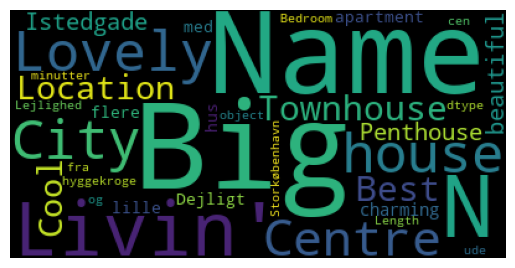

In [13]:
names_to_use = listings['name']
names_to_use = names_to_use.apply(lambda x: x.replace('Copenhagen',''))
names_to_use = names_to_use.apply(lambda x: x.replace('connected with a large living room',''))
names_to_use = names_to_use.apply(lambda x: x.replace('Ny rummelig lejlighed med tilhørende kat.',''))
names_to_use = names_to_use.apply(lambda x: x.replace('Beautiful, spacious, central, renovated',''))
names_to_use = names_to_use.apply(lambda x: x.replace('Sleeps 1-10 persons',''))
names_to_use = names_to_use.apply(lambda x: x.replace('- most attractive area',''))

wordcloud = WordCloud().generate(str(names_to_use))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 5. create a word cloud of the names of the hosts

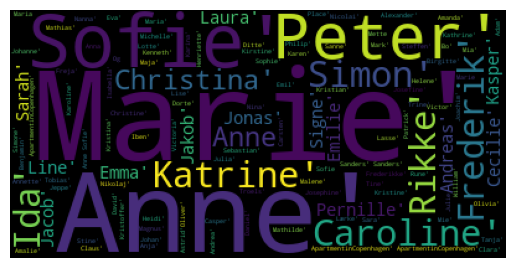

In [14]:
danish_names = ['PigenavneAnne',
 'Mette',
 'Kirsten',
 'Hanne',
 'Anna',
 'Helle',
 'Susanne',
 'Maria',
 'Lene',
 'Marianne',
 'Camilla',
 'Lone',
 'Louise',
 'Pia',
 'Charlotte',
 'Tina',
 'Gitte',
 'Jette',
 'Bente',
 'Julie',
 'DrengenavnePeter',
 'Michael',
 'Lars',
 'Jens',
 'Thomas',
 'Henrik',
 'Søren',
 'Christian',
 'Martin',
 'Jan',
 'Morten',
 'Jesper',
 'Anders',
 'Niels',
 'Mads',
 'Rasmus',
 'Per',
 'Mikkel',
 'Hans',
 'Kim',
 'EfternavneNielsen',
 'Jensen',
 'Hansen',
 'Andersen',
 'Pedersen',
 'Christensen',
 'Larsen',
 'Sørensen',
 'Rasmussen',
 'Jørgensen',
 'Petersen',
 'Madsen',
 'Kristensen',
 'Olsen',
 'Thomsen',
 'Christiansen',
 'Poulsen',
 'Johansen',
 'Møller',
 'Mortensen']

def remove_non_danish_names(text,names_for_reference):
    for name in names_for_reference:
        if text == name:
            text = text.replace(name,'')
            text = text.replace("'",'')
    return text.strip()

host_names = listings['host_name']
host_names_to_use = host_names.apply(lambda x: remove_non_danish_names(x,danish_names))
host_names_to_use = list(filter(lambda value: value != '', host_names_to_use.to_list()))

host_names_wordcloud = WordCloud().generate(str(host_names_to_use))

plt.imshow(host_names_wordcloud)
plt.axis("off")
plt.show()

#### 6. Create a new column using bins of price

In [15]:
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8', 'Bin 9', 'Bin 10', 'Bin 11']

listings.loc[:,'price_bin'] = pd.cut(listings['price'], bins=bin_edges, labels=bin_labels, right=False)

listings


C:\Users\Gruia\AppData\Local\Temp\ipykernel_22232\4151257309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.loc[:,'price_bin'] = pd.cut(listings['price'], bins=bin_edges, labels=bin_labels, right=False)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,6699.08,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,Bin 7
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,19396.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,Bin 11
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,24245.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,Bin 11
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,5408.5,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,Bin 6
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,14576.84,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,Bin 11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,6385.76,6,...,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,Bin 7
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,7833.0,2,...,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,Bin 8
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,3357.0,3,...,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,Bin 4
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,2984.0,1,...,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,Bin 3


#### 7. Using non-scaled versions of latitude and longitude, plot the listings data on a map

In [16]:
import folium

copenhagen_map = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

price_bin_color = {
        'Bin 1': 'blue',
        'Bin 2': 'green',
        'Bin 3': 'orange',
        'Bin 4': 'red',
        'Bin 5': 'purple',
        'Bin 6': 'yellow',
        'Bin 7': 'black',
        'Bin 8': 'brown',
        'Bin 9': 'pink',
        'Bin 10': 'cyan',
        'Bin 11': 'gray'
    }

# Reduce the size to output fewer points on the map
sampled_listings = listings.sample(n=300, random_state=42)

# 
for index, row in sampled_listings.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    price_bin = row['price_bin']
    name = row['name']

    folium.Marker(
        location=[latitude, longitude],
        popup=name,
        icon=folium.Icon(color=price_bin_color.get(price_bin, 'gray'))
    ).add_to(copenhagen_map)

C:\Users\Gruia\AppData\Local\Temp\ipykernel_22232\2258658116.py:32: UserWarning: color argument of Icon should be one of: {'darkpurple', 'lightgreen', 'beige', 'pink', 'lightgray', 'darkgreen', 'darkred', 'red', 'white', 'black', 'gray', 'green', 'lightred', 'lightblue', 'darkblue', 'blue', 'cadetblue', 'orange', 'purple'}.
  icon=folium.Icon(color=price_bin_color.get(price_bin, 'gray'))


In [17]:
copenhagen_map

#### 7. Create a plot where you group the listings with regard to the neighbourhood

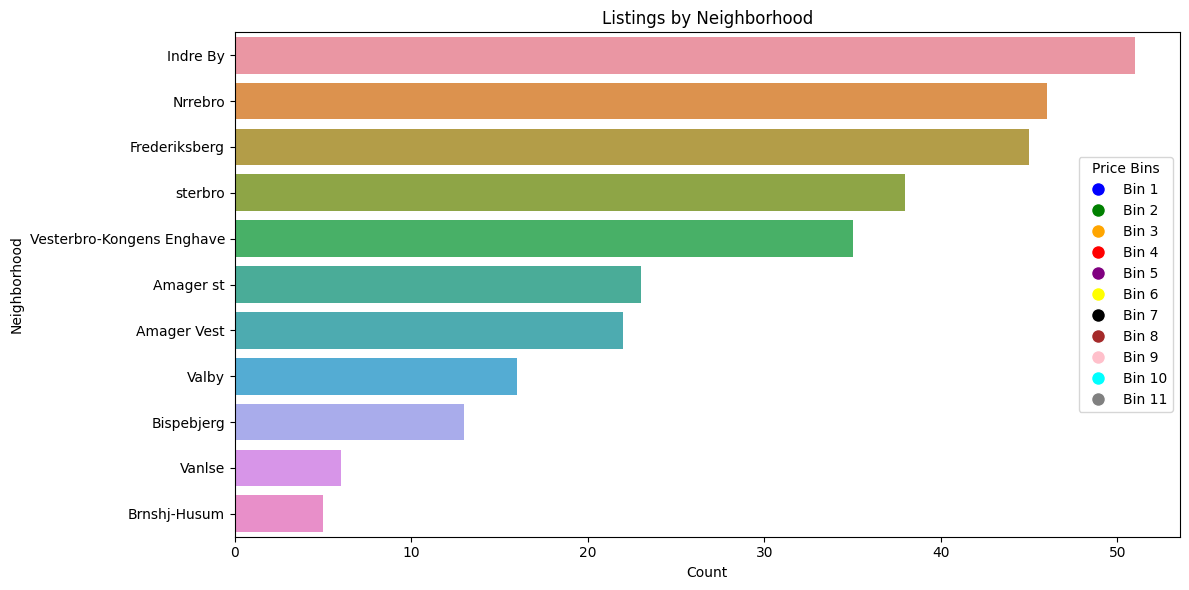

In [18]:
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=sampled_listings, y='neighbourhood_cleansed', order=sampled_listings['neighbourhood_cleansed'].value_counts().index)

# Create a custom legend with colored patches for price bins
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=bin_label, markersize=10,
                     markerfacecolor=color) for bin_label, color in price_bin_color.items()]

# Add the legend to the plot
ax.legend(handles=legend_patches, title='Price Bins', loc='center right')

plt.title('Listings by Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

#### 8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis

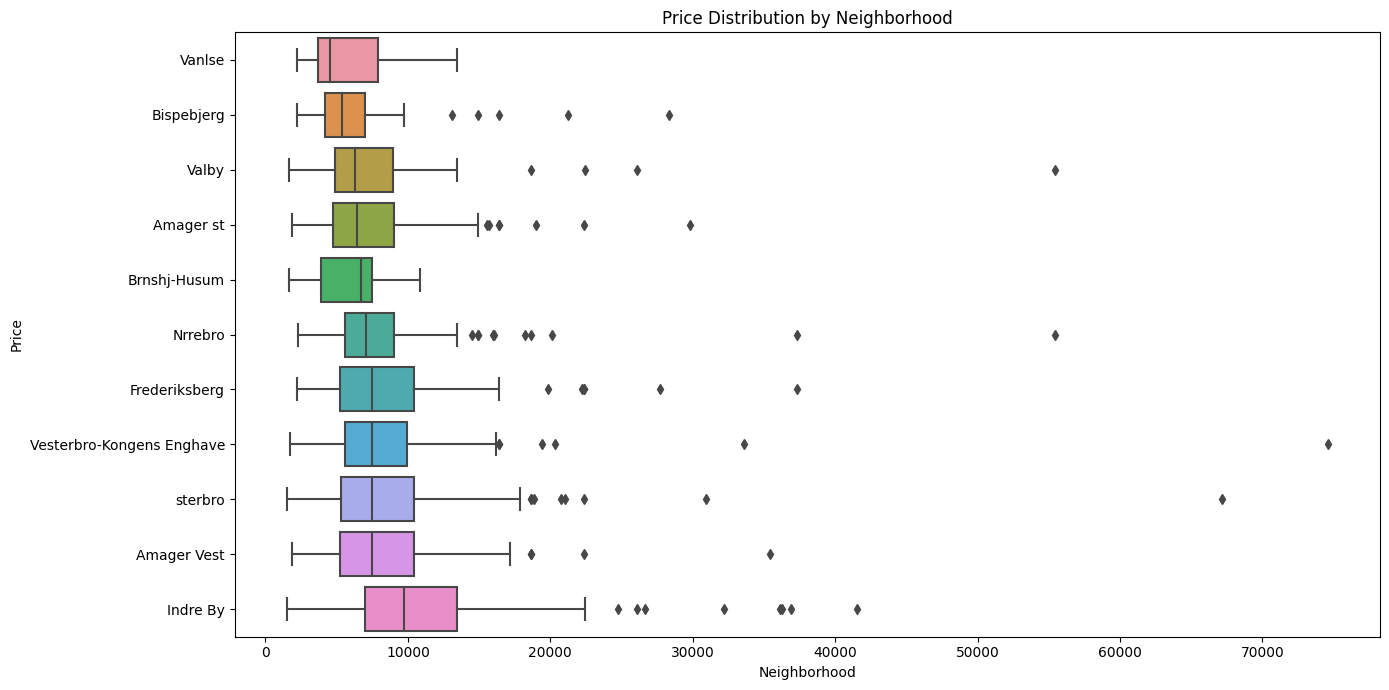

In [19]:
sampled_listings = listings.sample(n=1000, random_state=42)

# Create boxplots of price by neighborhood
plt.figure(figsize=(14, 7))
sns.boxplot(data=sampled_listings, x='price', y='neighbourhood_cleansed', 
            order=sampled_listings.groupby('neighbourhood_cleansed')['price'].median().sort_values().index)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

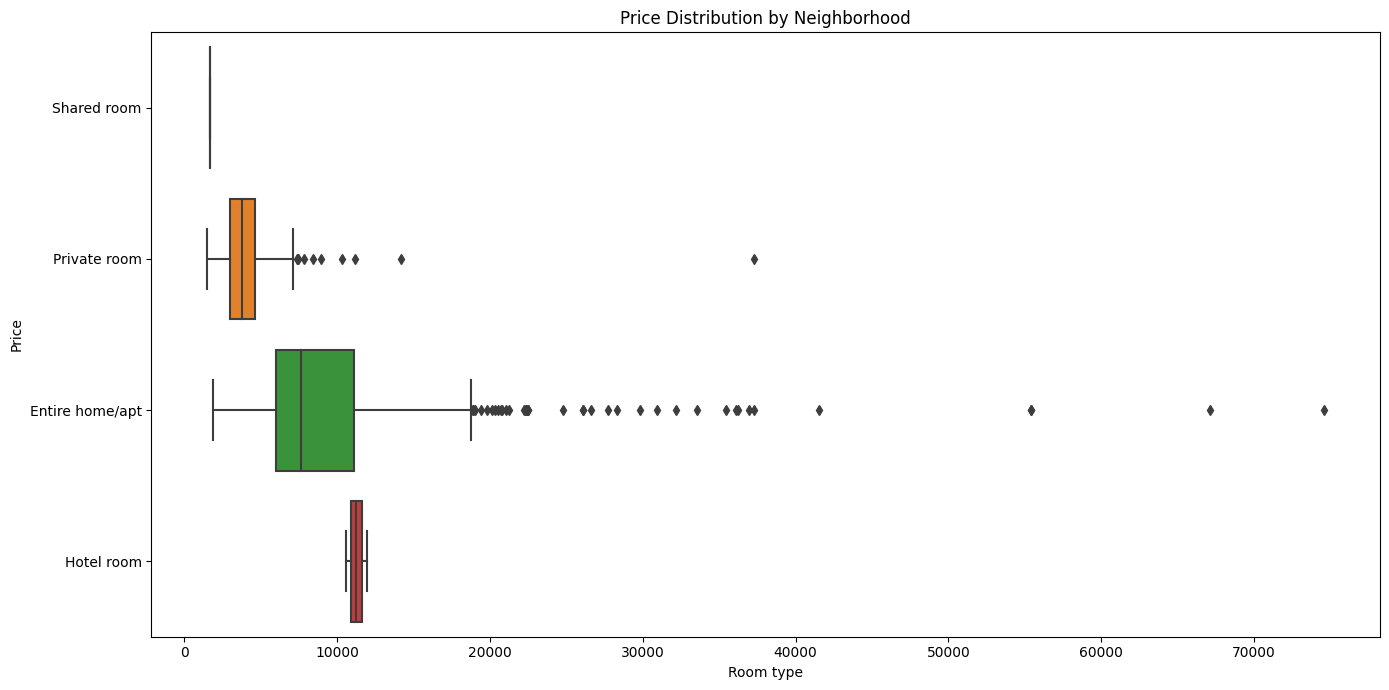

In [20]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=sampled_listings, x='price', y='room_type', 
            order=sampled_listings.groupby('room_type')['price'].median().sort_values().index)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

#### 9. Create a bar chart of the hosts with the top ten most listings

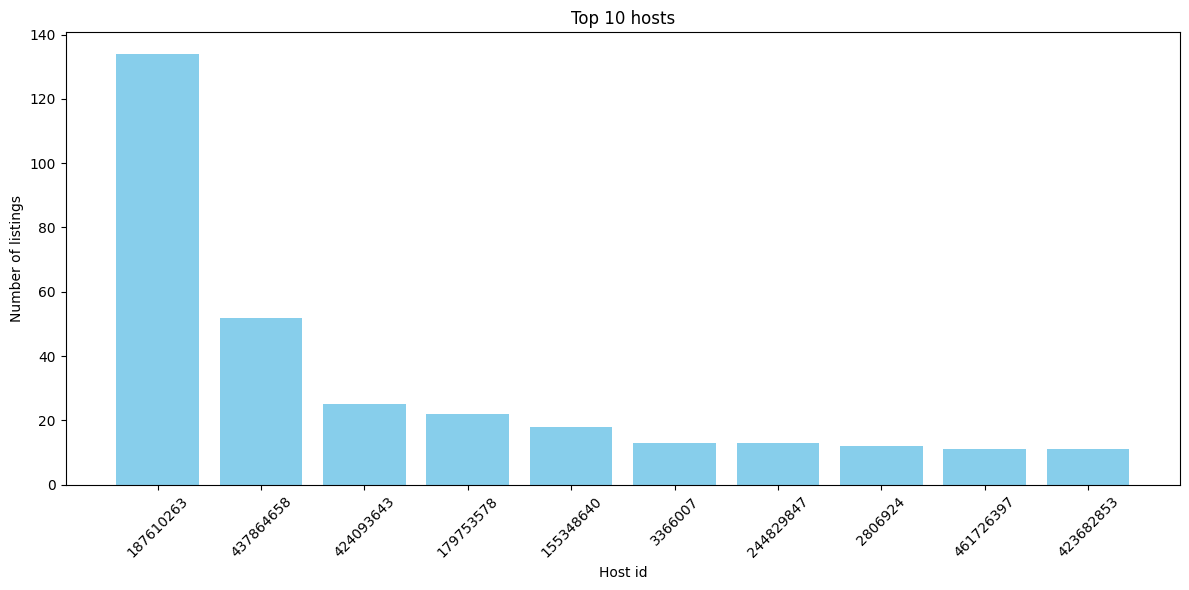

In [21]:
host_listings_count = listings['host_id'].value_counts().reset_index()
host_listings_count.columns = ['Host ID', 'Count']

# sort the data by count in descending order and select the top 10 hosts
top_10_hosts = host_listings_count.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_hosts['Host ID'].astype(str), top_10_hosts['Count'], color='skyblue')
plt.title('Top 10 hosts')
plt.xlabel('Host id')
plt.ylabel('Number of listings')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### 10. Do a descriptive analysis of the neighborhoods

In [22]:
descriptive_stats = listings.groupby(['neighbourhood_cleansed', 'room_type'])[['price', 'number_of_reviews']].describe()

descriptive_stats

number_of_reviews              \
                                                      count        mean   
neighbourhood_cleansed    room_type                                       
Amager Vest               Entire home/apt             909.0   16.925193   
                          Private room                148.0   46.716216   
                          Shared room                   2.0    1.000000   
Amager st                 Entire home/apt             791.0   17.463970   
                          Hotel room                    3.0   17.000000   
                          Private room                129.0   51.527132   
                          Shared room                   1.0    4.000000   
Bispebjerg                Entire home/apt             508.0   13.507874   
                          Private room                 95.0   26.200000   
                          Shared room                   1.0  550.000000   
Brnshj-Husum              Entire home/apt             216.0   13.736111   
                          Private room                 67.0   23.940299   
                          Shared room                   2.0   31.000000   
Frederiksberg             Entire home/apt            1044.0   16.172414   
                          Private room                133.0   25.308271   
Indre By                  Entire home/apt            1702.0   30.964160   
                          Hotel room                   10.0   80.800000   
                          Private room                128.0   52.695312   
                          Shared room                   4.0   66.250000   
Nrrebro                   Entire home/apt            1889.0   16.183166   
                          Private room                165.0   39.666667   
                          Shared room                   3.0   31.666667   
Valby                     Entire home/apt             450.0   13.062222   
                          Private room                 89.0   29.539326   
Vanlse                    Entire home/apt             254.0   17.244094   
                          Private room                 44.0   48.340909   
Vesterbro-Kongens Enghave Entire home/apt            1811.0   17.699613   
                          Private room                221.0   57.918552   
                          Shared room                   2.0  117.000000   
sterbro                   Entire home/apt            1174.0   14.417376   
                          Private room                130.0   31.830769   
                          Shared room                   1.0    4.000000   

                                                                             \
                                                  std    min     25%    50%   
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   24.806940    1.0    4.00    8.0   
                          Private room      79.574125    1.0    4.00   18.0   
                          Shared room        0.000000    1.0    1.00    1.0   
Amager st                 Entire home/apt   29.990056    1.0    3.00    8.0   
                          Hotel room         3.000000   14.0   15.50   17.0   
                          Private room      65.217793    1.0    8.00   26.0   
                          Shared room             NaN    4.0    4.00    4.0   
Bispebjerg                Entire home/apt   20.650800    1.0    3.00    7.0   
                          Private room      45.694546    1.0    4.00   11.0   
                          Shared room             NaN  550.0  550.00  550.0   
Brnshj-Husum              Entire home/apt   24.413488    1.0    3.00    7.0   
                          Private room      28.394878    1.0    5.50   15.0   
                          Shared room       36.769553    5.0   18.00   31.0   
Frederiksberg             Entire home/apt   24.387629    1.0    3.00    8.0   
                          Private room      31.621382    1.0    3.00   11

#### 11. Supply a list of the top 10 highest rated listings and visualize them on a map

In [23]:

listings_sorted = listings.sort_values(by='review_scores_rating', ascending=False)

# Select the top 10 highest-rated listings
top_10_listings = listings_sorted.head(10)

# Create a map
copenhagen_map = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Iterate through the top 10 listings and add markers to the map
for index, row in top_10_listings.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    rating = row['review_scores_rating']
    name = row['name']

    folium.Marker(
        location=[latitude, longitude],
        popup=f"{name} (Rating: {rating})",
        icon=folium.Icon(color='blue')
    ).add_to(copenhagen_map)

# Display the map
copenhagen_map


#### 12. Use any preprocessing and feature engineering steps that you find relevant before proceeding

#### 13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price.

In [24]:
median_price = listings['price'].median()

# Create a new column 'price_category' and set it to 1 for 'expensive' and 0 for 'affordable'
listings.loc[:,'price_category'] = (listings['price'] > median_price).astype(int)

C:\Users\Gruia\AppData\Local\Temp\ipykernel_22232\183266984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.loc[:,'price_category'] = (listings['price'] > median_price).astype(int)


In [25]:
print(listings[['price', 'price_category']])

          price  price_category
0       6699.08               0
1       19396.0               1
2       24245.0               1
3        5408.5               0
4      14576.84               1
...         ...             ...
13808   6385.76               0
13809    7833.0               1
13811    3357.0               0
13812    2984.0               0
13814    3133.2               0

[12126 rows x 2 columns]


#### 14. Devide the data into training and test data

In [37]:
from sklearn.model_selection import train_test_split

numeric_columns = listings.select_dtypes(include=['number'])
X = numeric_columns.drop('price_category', axis=1)  # Features
y = numeric_columns['price_category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Do feature scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Naïve Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the Naïve Bayes model
accuracy_nb = accuracy_score(y_test, nb_predictions)
print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")
print(classification_report(y_test, nb_predictions))

Naïve Bayes Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.58      0.70      0.63      1238
           1       0.60      0.48      0.53      1188

    accuracy                           0.59      2426
   macro avg       0.59      0.59      0.58      2426
weighted avg       0.59      0.59      0.58      2426



#### k-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with, for example, k=5 neighbors
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the k-NN model
accuracy_knn = accuracy_score(y_test, knn_predictions)
print(f"k-NN Accuracy: {accuracy_knn:.2f}")
print(classification_report(y_test, knn_predictions))

k-NN Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1238
           1       0.60      0.63      0.61      1188

    accuracy                           0.61      2426
   macro avg       0.61      0.61      0.61      2426
weighted avg       0.61      0.61      0.61      2426

